In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [51]:
df_weekly_charts = pd.read_csv('Resources/2019-weekly-regional-charts.csv')
df_kaggle_spotify = pd.read_csv("Resources/kaggle_spotify.csv")
df_country_happiness = pd.read_csv("Resources/country_happiness_2019.csv")

df_kaggle_spotify=df_kaggle_spotify.rename(columns={'id':'ID','artists':'Kaggle Artists','name':'Kaggle Name','year':'release_year'})

df_weekly_charts=pd.merge(df_weekly_charts,df_kaggle_spotify,on='ID',how='inner')

df_weekly_charts_reduced = df_weekly_charts.loc[(df_weekly_charts["Region"]!='Global'), ['Region','ID','duration_ms','popularity','acousticness','danceability','energy', 'instrumentalness','liveness','loudness','speechiness','tempo','valence']].reset_index(drop=True)

df_weekly_charts_reduced.rename(columns={'Region':'region','ID':'id'},inplace=True)
df_weekly_charts_reduced.head()

,region,id,duration_ms,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,United States,696DnlkuDOXcMAnKlTgXXK,163636,92,0.0522,0.621,0.601,0.0,0.46,-5.616,0.148,116.735,0.457
1,United States,696DnlkuDOXcMAnKlTgXXK,163636,92,0.0522,0.621,0.601,0.0,0.46,-5.616,0.148,116.735,0.457
2,United States,696DnlkuDOXcMAnKlTgXXK,163636,92,0.0522,0.621,0.601,0.0,0.46,-5.616,0.148,116.735,0.457
3,United States,696DnlkuDOXcMAnKlTgXXK,163636,92,0.0522,0.621,0.601,0.0,0.46,-5.616,0.148,116.735,0.457
4,United States,696DnlkuDOXcMAnKlTgXXK,163636,92,0.0522,0.621,0.601,0.0,0.46,-5.616,0.148,116.735,0.457


In [52]:
df_region_stream_metrics = df_weekly_charts_reduced.groupby('region').mean()

df_country_happiness_reduced = df_country_happiness \
                                .loc[:, ['Country or region', 'Score', 'Freedom to make life choices']] \
                                .rename(columns={'Country or region':'region',
                                                'Score':'happiness_score',
                                                'Freedom to make life choices':'freedom_score'})

df_region_metrics = df_region_stream_metrics.merge(df_country_happiness_reduced, how='inner', on='region')
df_region_metrics['duration_min'] = [round(d/60000, 2) for d in df_region_metrics.duration_ms]
df_region_metrics

,region,duration_ms,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,happiness_score,freedom_score,duration_min
0,Argentina,224774.063054,77.385920,0.261119,0.739530,0.676108,0.008977,0.165075,-5.262212,0.127265,118.806570,0.616618,6.086,0.471,3.75
1,Australia,203574.106395,79.790380,0.252328,0.688426,0.599283,0.013682,0.169255,-6.656060,0.108818,118.308871,0.470483,7.228,0.557,3.39
2,Austria,197454.921713,80.758346,0.258635,0.680016,0.617629,0.010438,0.172952,-6.318327,0.099960,117.649954,0.479943,7.246,0.532,3.29
3,Belgium,202407.673094,80.592751,0.263673,0.680899,0.618882,0.017439,0.171213,-6.333646,0.101234,116.889561,0.478379,6.923,0.473,3.37
4,Bolivia,221323.211192,77.217125,0.265371,0.735836,0.675196,0.009100,0.159750,-5.236152,0.120779,120.586892,0.619552,5.779,0.511,3.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Thailand,204572.392938,78.330418,0.266670,0.671809,0.612048,0.009132,0.168580,-6.220308,0.098157,114.297929,0.497625,6.008,0.557,3.41
57,Turkey,192314.939279,83.787476,0.298053,0.708585,0.573603,0.018957,0.156001,-6.837219,0.121081,123.129008,0.439298,5.373,0.195,3.21
58,United Kingdom,204638.359401,79.104608,0.252563,0.675574,0.614489,0.011512,0.170327,-6.583802,0.106205,117.915502,0.479450,7.054,0.450,3.41
59,United States,195345.000709,78.720922,0.245904,0.718296,0.588010,0.010279,0.168594,-6.717729,0.147756,121.660258,0.461629,6.892,0.454,3.26


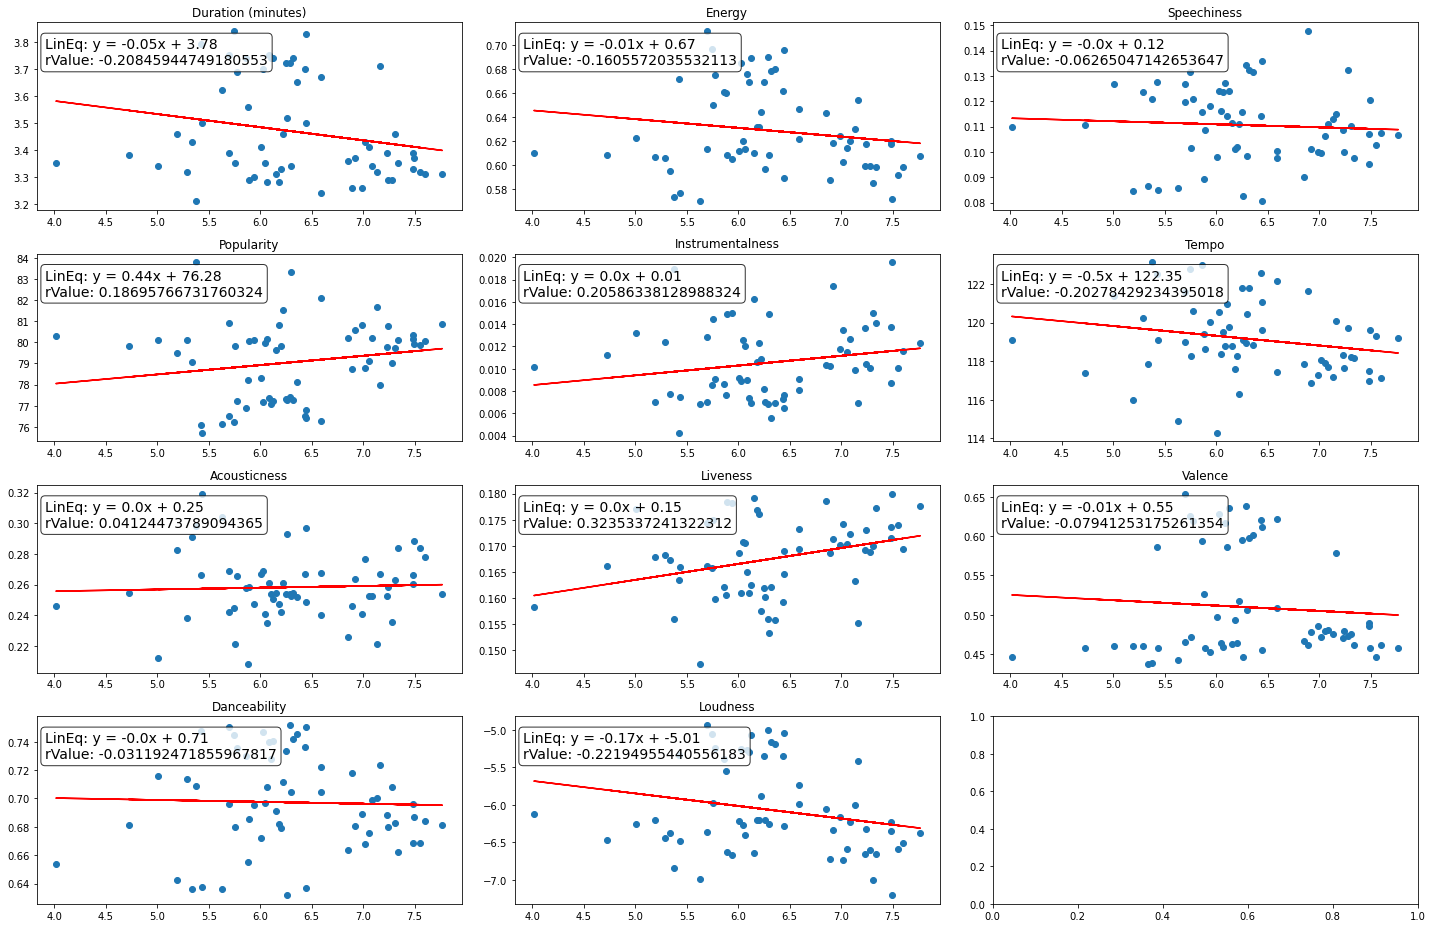

In [61]:
spotify_metrics = {
    'duration_min':'Duration (minutes)',
    'popularity': 'Popularity',
    'acousticness': 'Acousticness',
    'danceability':'Danceability',
    'energy':'Energy',
    'instrumentalness':'Instrumentalness',
    'liveness':'Liveness',
    'loudness':'Loudness',
    'speechiness':'Speechiness',
    'tempo':'Tempo',
    'valence':'Valence'
    }

fig, axs = plt.subplots(4, 3)

y = 0
x = 0

for m in spotify_metrics:
    x_values = df_region_metrics.happiness_score
    y_values = df_region_metrics[m]

    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
    regress_values = (slope * x_values) + intercept

    axs[y][x].scatter(x_values,y_values)
    axs[y][x].plot(x_values,regress_values, color='red')
    # axs[y][x].set_ylabel(spotify_metrics[m])
    axs[y][x].title.set_text(spotify_metrics[m])

    textstr = f'LinEq: y = {round(slope, 2)}x + {round(intercept, 2)}\nrValue: {rvalue}'
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    axs[y][x].text(0.02, 0.92, textstr, transform=axs[y][x].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    if y == 3:
        y = -1
        x += 1

    y += 1

fig.set_size_inches(20, 13)
plt.tight_layout()
plt.show()

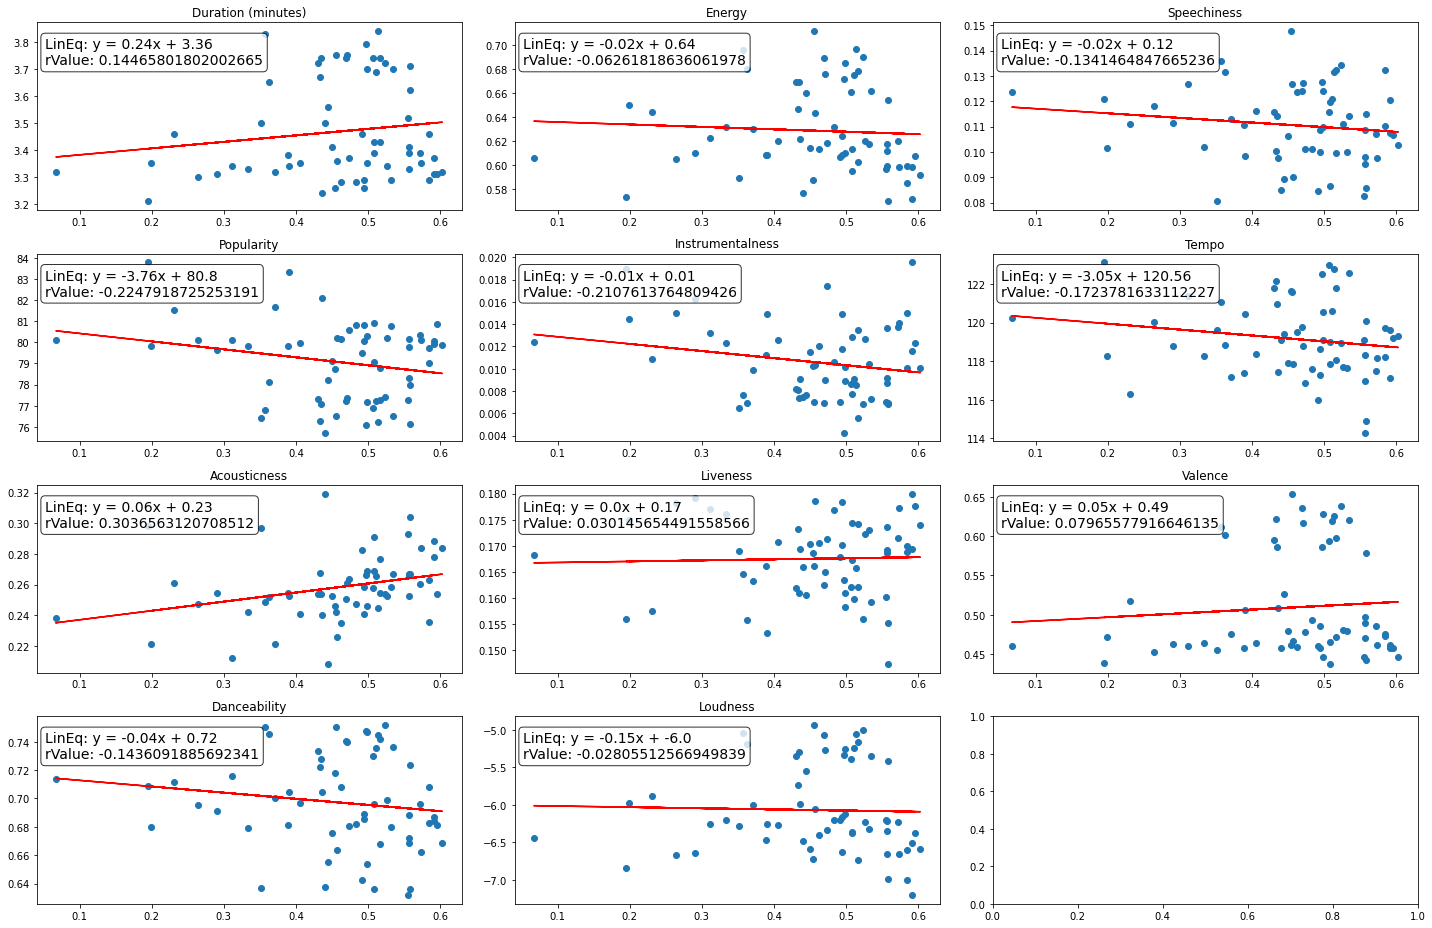

In [62]:
fig, axs = plt.subplots(4, 3)

y = 0
x = 0

for m in spotify_metrics:
    x_values = df_region_metrics.freedom_score
    y_values = df_region_metrics[m]

    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
    regress_values = (slope * x_values) + intercept

    axs[y][x].scatter(x_values,y_values)
    axs[y][x].plot(x_values,regress_values, color='red')
    # axs[y][x].set_ylabel(spotify_metrics[m])
    axs[y][x].title.set_text(spotify_metrics[m])

    textstr = f'LinEq: y = {round(slope, 2)}x + {round(intercept, 2)}\nrValue: {rvalue}'
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    axs[y][x].text(0.02, 0.92, textstr, transform=axs[y][x].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    if y == 3:
        y = -1
        x += 1

    y += 1

fig.set_size_inches(20, 13)
plt.tight_layout()
plt.show()